In [1]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
PlotAxes.set_backend!(:ggplot2)

┌ Info: Loading RCall ggplot2 backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/OxaSg/src/PlotAxes.jl:252
┌ Warning: RCall.jl: Warning: package ‘ggplot2’ was built under R version 3.5.2
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113
┌ Info: Loading Gadfly backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/OxaSg/src/PlotAxes.jl:271


:ggplot2

In [2]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")
settings = TOML.parsefile(settings)

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[2]:2
└ @ Core In[2]:2


Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.2,"min_length"=>…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window"=>0.5,"delta"=>0.25)
  "rates"           => Dict{AbstractString,Any}("freqbound"=>Dict{AbstractStrin…
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "stimulus"        => Dict{AbstractString,Any}("repeats"=>100,"pattern"=>"aba_…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"n…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window"=>0.8,"full_band_ratio"…

In [3]:
p = copy(params[select_params(params,t_c_a=130,t_c_m=44,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,0.0,130.0,44.0,500 Hz,6.0,3.0,3.0,7.0


In [5]:
p.Δf

1-element Array{Int64,1}:
 6

# Best object-level

In [6]:
result = bistable_model(p,settings,intermediate_results=true);

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::getfield(AuditoryBistabilityLE, Symbol("##112#113")){DataFrame})(::Symbol) at none:0
└ @ AuditoryBistabilityLE ./none:0
┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/stim.jl:43
┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


In [48]:
keys(result)

(:percepts, :primary_source, :sources, :cohere, :cortical, :spect, :input)

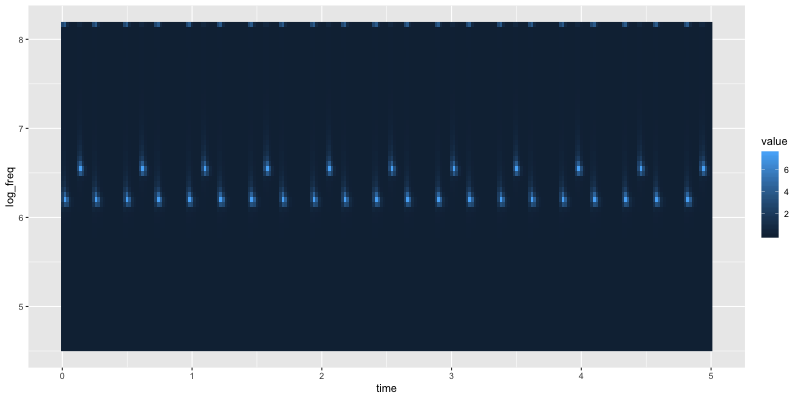

RObject{VecSxp}


In [49]:
plotaxes(result.spect.result[0s .. 5s],:time,:freq => logrange,quantize=(500,128))

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/Documents/juliadev/PlotAxes/src/ggplot2.jl:23


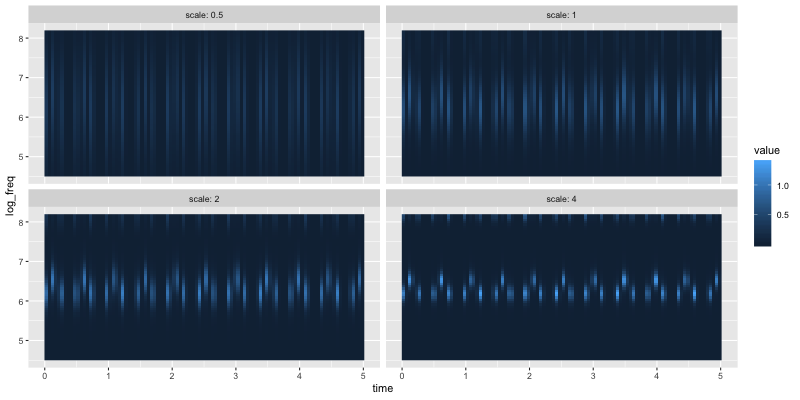

RObject{VecSxp}


In [50]:
plotaxes(result.cortical.result[0s .. 5s],:time,:freq,:scale)

In [51]:
size(result.cohere[0s .. 5s,:,:,:])

(50, 4, 19, 2)

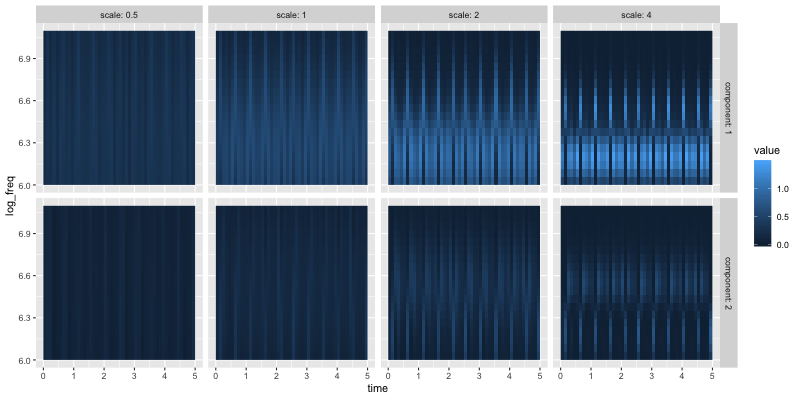

RObject{VecSxp}


In [52]:
plotaxes(result.cohere[0s .. 5s,:,:,:],:time,:freq => logrange,:scale,:component)

In [53]:
keys(result.sources)

(:tracks, :result, :inweights, :outweights, :adapt, :inhibit)

In [54]:
axisnames(result.sources.tracks[1])

(:scale, :freq, :component, :time)

In [55]:
AxisArrays.axes(result.sources.tracks)

(Axis{:params,Array{Tuple{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Float64,Float64},1}}(Tuple{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Float64,Float64}[(3.0 s, 0.25, 150.0), (3.0 s, 0.5, 150.0), (3.0 s, 0.8, 150.0), (3.0 s, 0.25, 200.0), (3.0 s, 0.5, 200.0), (3.0 s, 0.8, 200.0)]),)

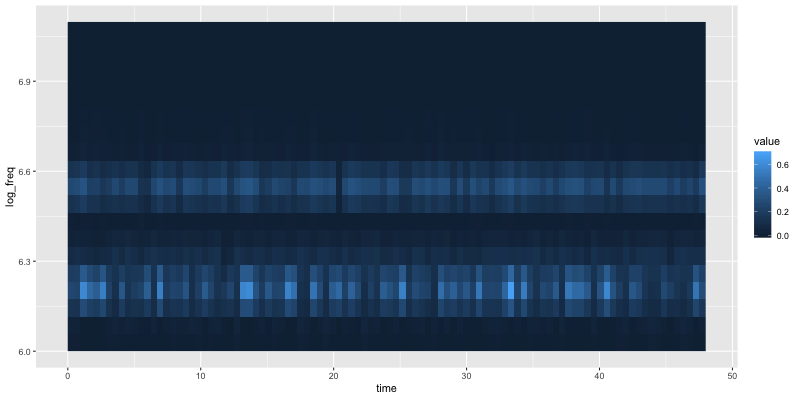

RObject{VecSxp}


In [56]:
plotaxes(result.primary_source,:time,:freq => logrange)

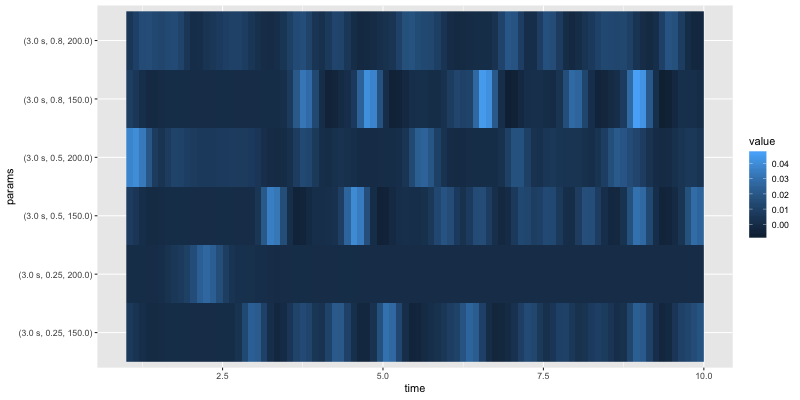

RObject{VecSxp}


In [57]:
plotaxes(result.sources.outweights[1s .. 10s])

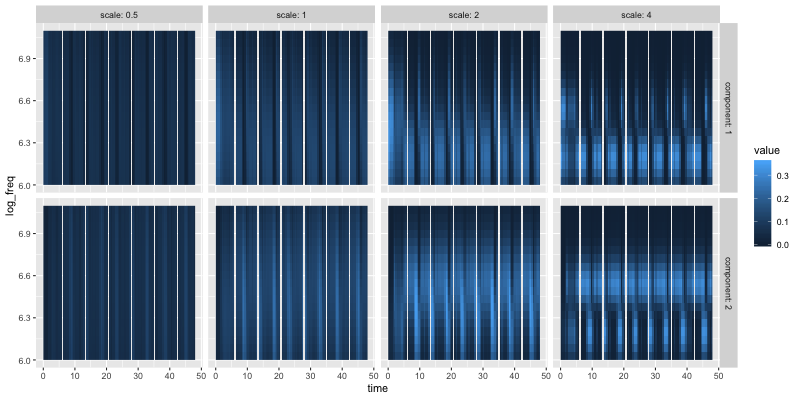

RObject{VecSxp}


In [58]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))],:time,:freq => logrange,:scale,:component)

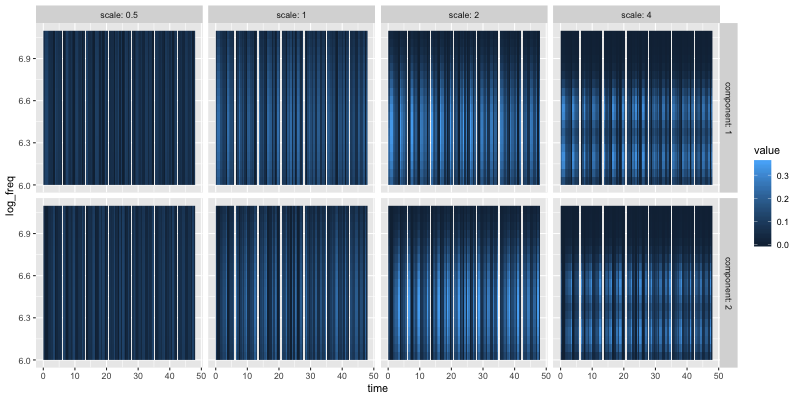

RObject{VecSxp}


In [59]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))],:time,:freq => logrange,:scale,:component)

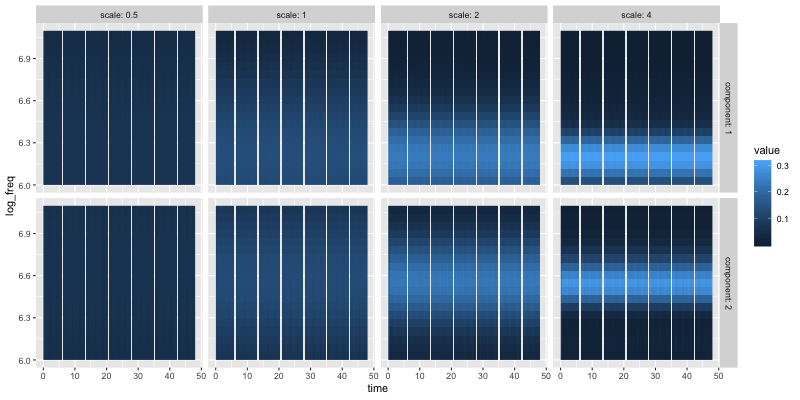

RObject{VecSxp}


In [60]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))],:time,:freq => logrange,:scale,:component)

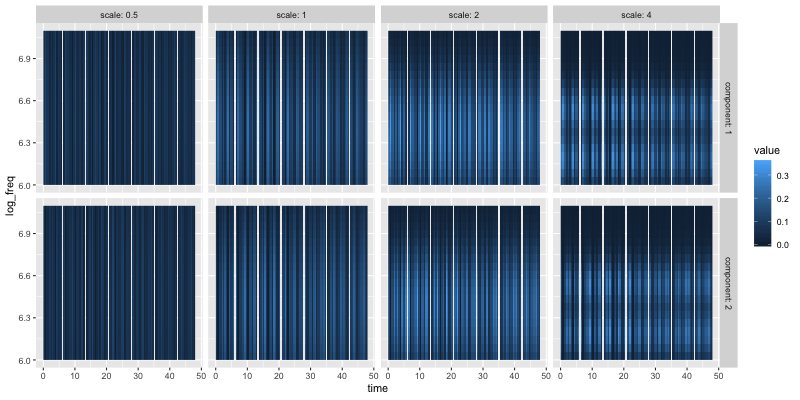

RObject{VecSxp}


In [61]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))],:time,:freq => logrange,:scale,:component)

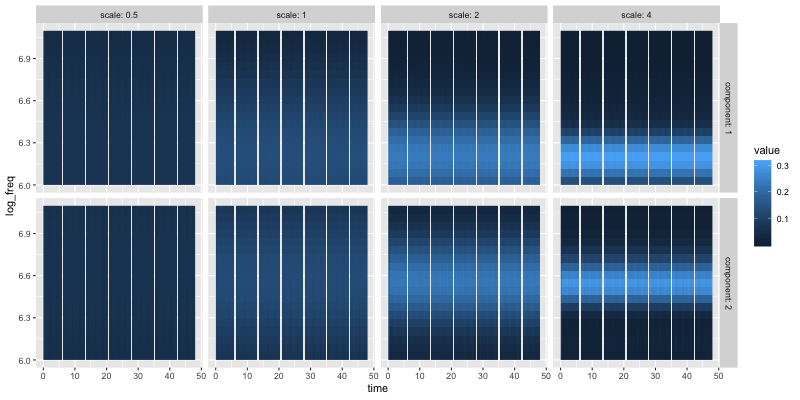

RObject{VecSxp}


In [62]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))],:time,:freq => logrange,:scale,:component)

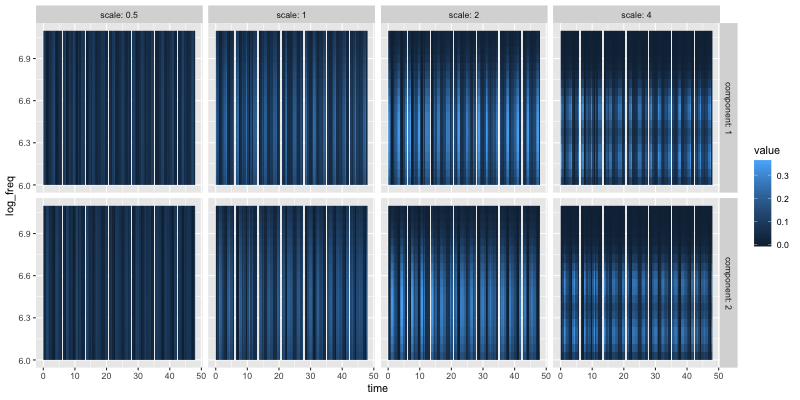

RObject{VecSxp}


In [63]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))],:time,:freq => logrange,:scale,:component)

Thoughts about these figures: the rate of switching is really fast. The slower phase revealed in the responses is a product of individual tones flickering in and out due the much faster phases of the competing explanations.

# Most consistent Object-level

This model has a more plausible rate of switching and this set of parameters is more consistent with the best-fit parameters of the other stages.

In [64]:
p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,0.0,5.0,5.0,500 Hz,6.0,3.0,3.0,7.0


In [67]:
result = bistable_model(p,settings,intermediate_results=true);

┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


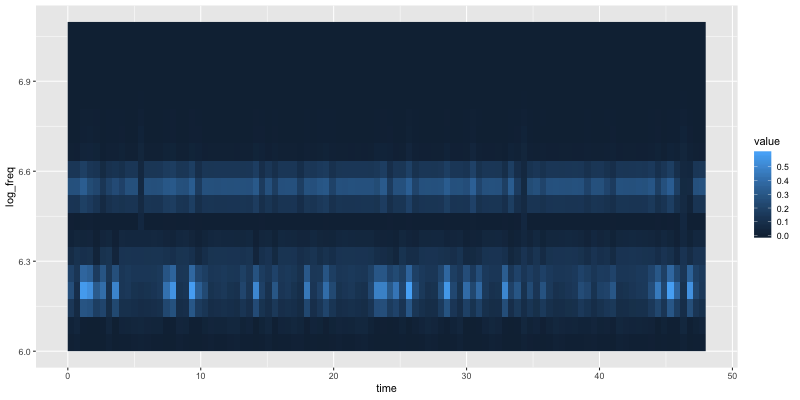

RObject{VecSxp}


In [68]:
plotaxes(result.primary_source,:time,:freq => logrange)

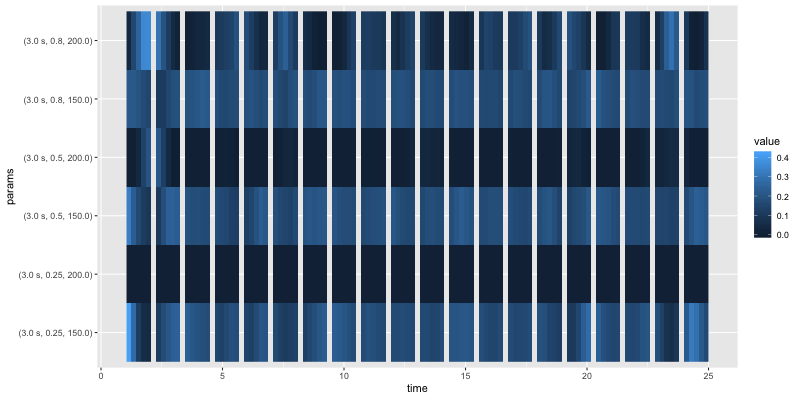

RObject{VecSxp}


In [70]:
plotaxes(result.sources.outweights[1s .. 25s])

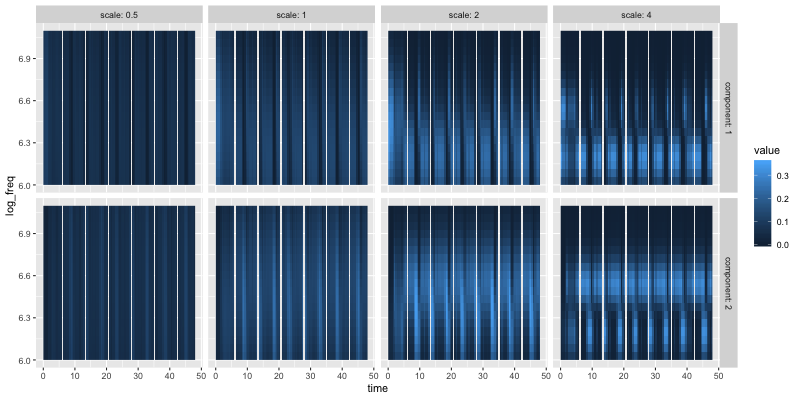

RObject{VecSxp}


In [58]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))],:time,:freq => logrange,:scale,:component)

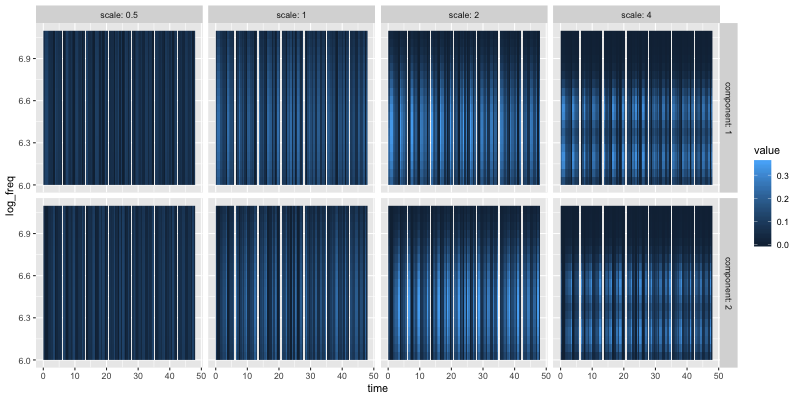

RObject{VecSxp}


In [59]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))],:time,:freq => logrange,:scale,:component)

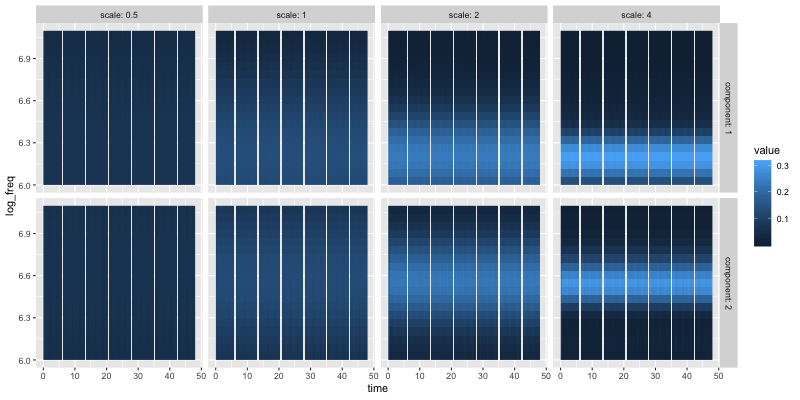

RObject{VecSxp}


In [60]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))],:time,:freq => logrange,:scale,:component)

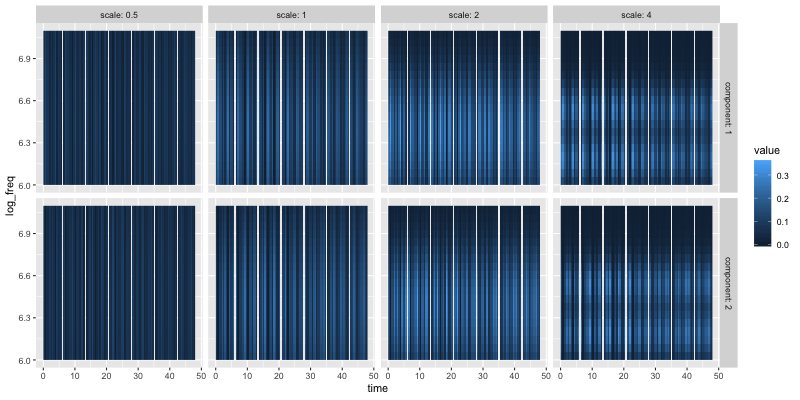

RObject{VecSxp}


In [61]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))],:time,:freq => logrange,:scale,:component)

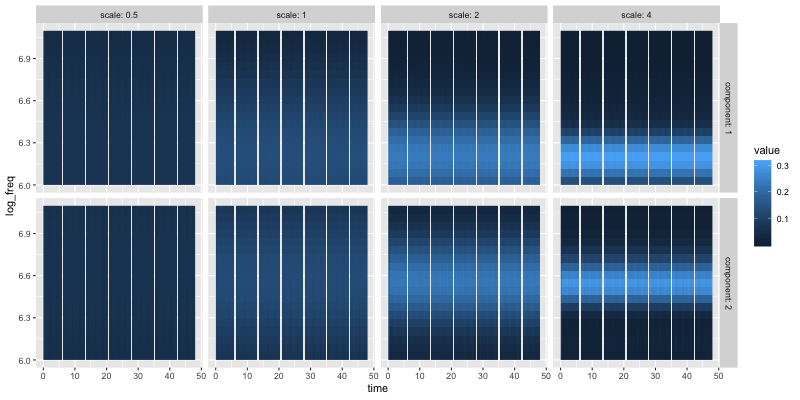

RObject{VecSxp}


In [62]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))],:time,:freq => logrange,:scale,:component)

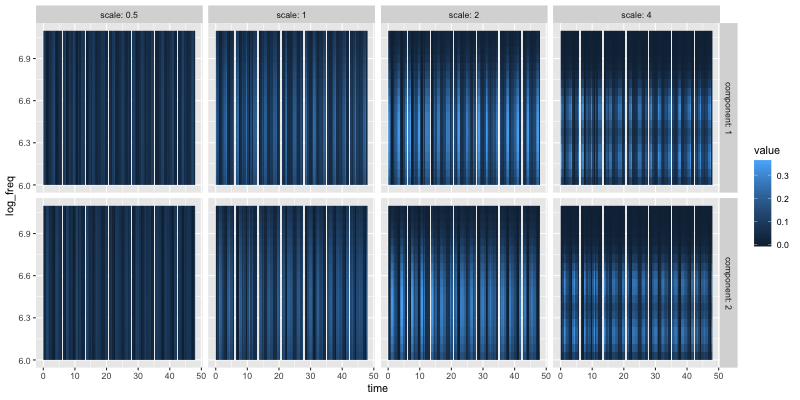

RObject{VecSxp}


In [63]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))],:time,:freq => logrange,:scale,:component)

# Most consistent Central-level

In [97]:
p = copy(params[select_params(params,s_c_a=5,s_c_m=5,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0


In [75]:
result = bistable_model(p,settings,intermediate_results=true);

┌ Info: 0.62% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


In [78]:
keys(result)

(:percepts, :primary_source, :sources, :cohere, :cortical, :spect, :input)

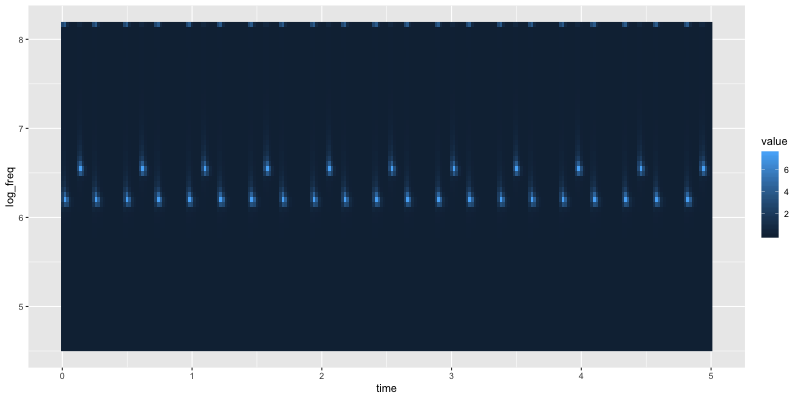

RObject{VecSxp}


In [83]:
plotaxes(result.spect.result[0s .. 5s],:time,:freq => logrange,quantize=(500,128))

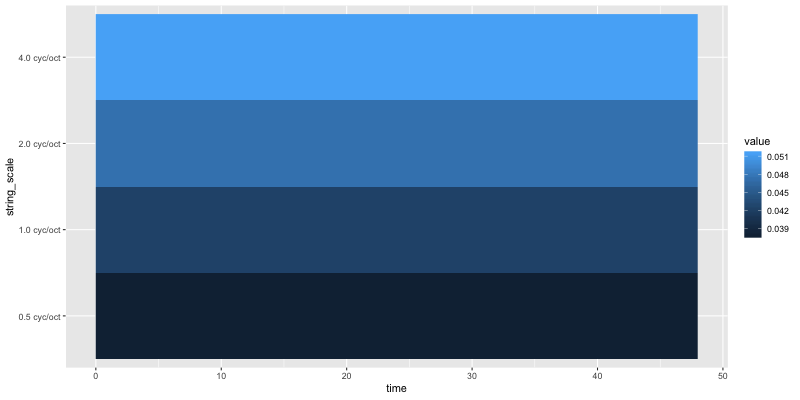

RObject{VecSxp}


In [87]:
plotaxes(result.cortical.inweights,:time,:scale => string)

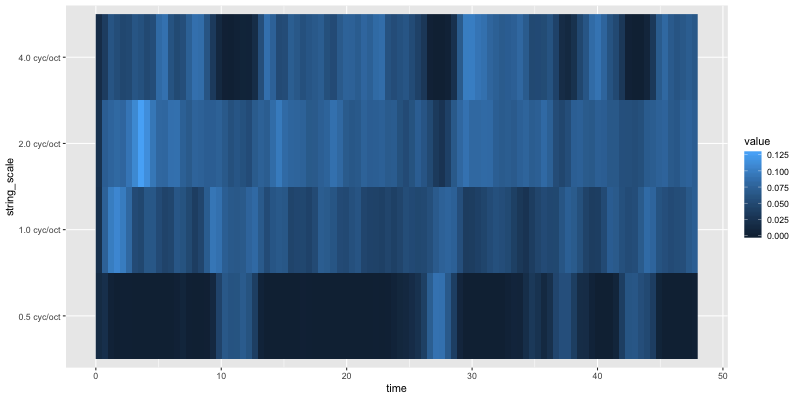

RObject{VecSxp}


In [88]:
plotaxes(result.cortical.outweights,:time,:scale => string)

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/Documents/juliadev/PlotAxes/src/ggplot2.jl:23


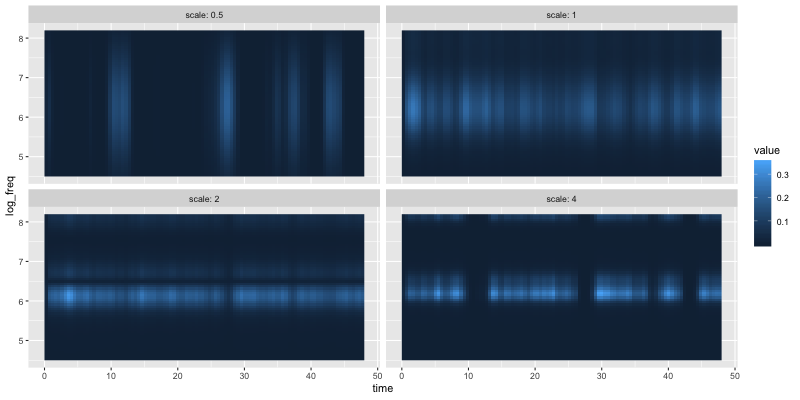

RObject{VecSxp}


In [89]:
plotaxes(result.cortical.result)

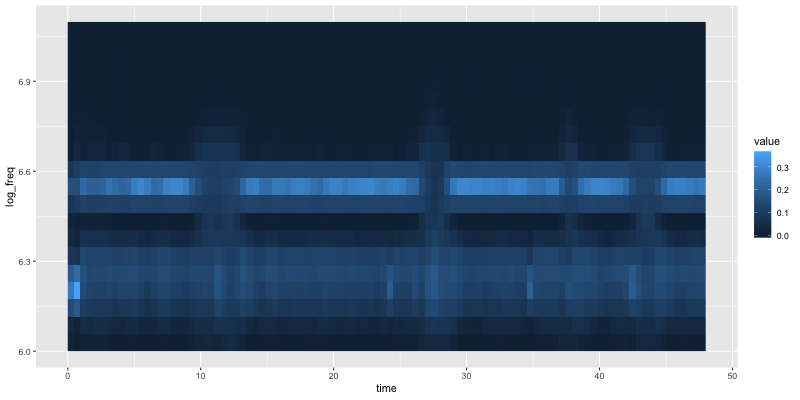

RObject{VecSxp}


In [76]:
plotaxes(result.primary_source,:time,:freq => logrange)

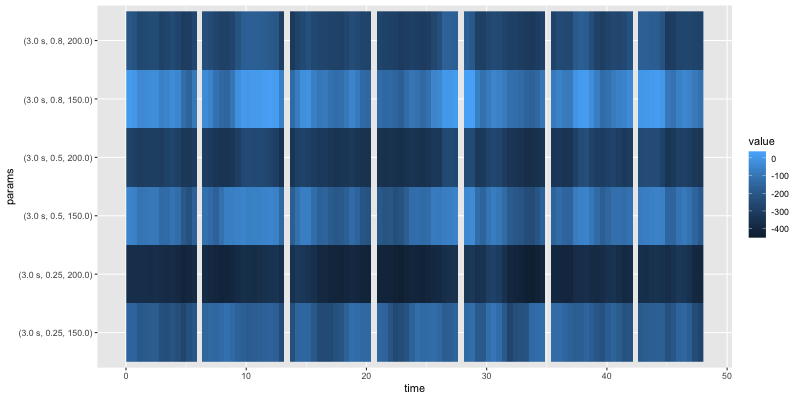

RObject{VecSxp}


In [96]:
plotaxes(result.sources.result)

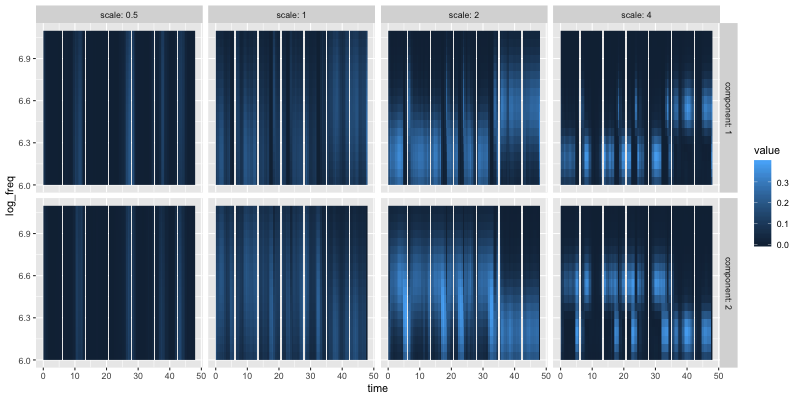

RObject{VecSxp}


In [90]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))],:time,:freq => logrange,:scale,:component)

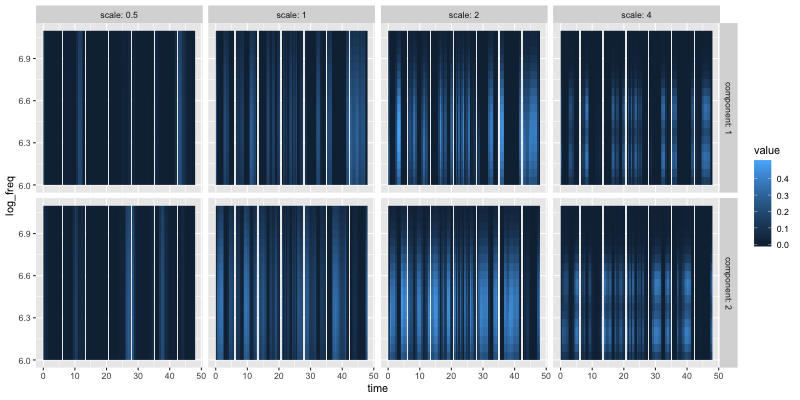

RObject{VecSxp}


In [91]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))],:time,:freq => logrange,:scale,:component)

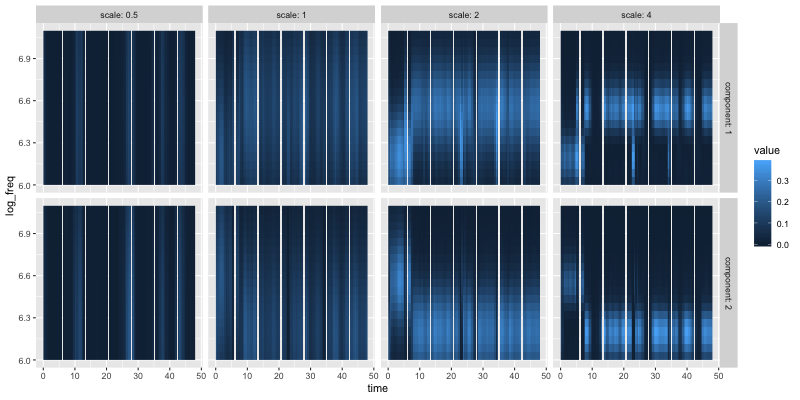

RObject{VecSxp}


In [92]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))],:time,:freq => logrange,:scale,:component)

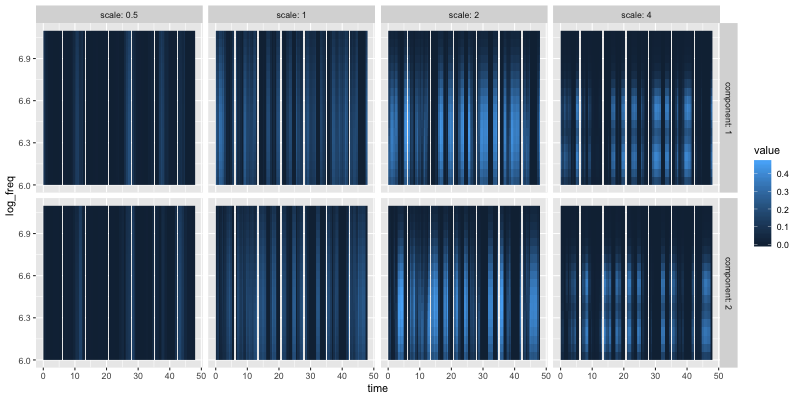

RObject{VecSxp}


In [93]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))],:time,:freq => logrange,:scale,:component)

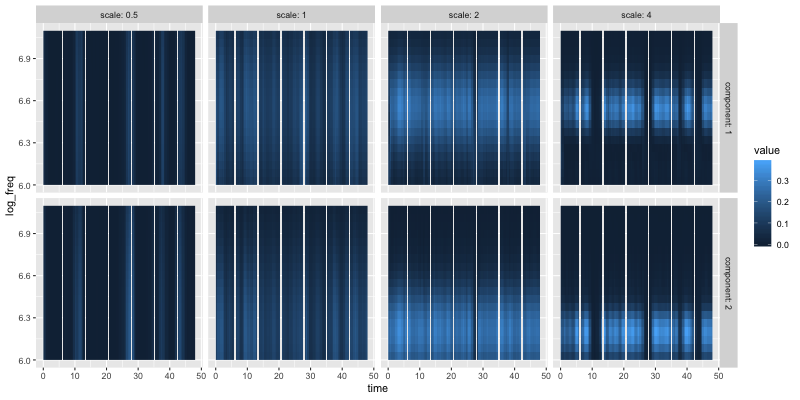

RObject{VecSxp}


In [94]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))],:time,:freq => logrange,:scale,:component)

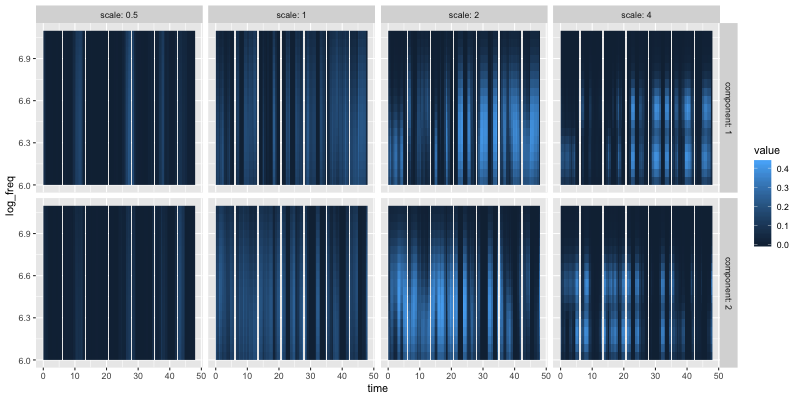

RObject{VecSxp}


In [95]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))],:time,:freq => logrange,:scale,:component)

# Poor peforming peripheral-level

NOTE: I found this one by accident, by mixing up adaptation and inhibition. It gives a bad result, and our measure says it's bad. BUT, there is also something very weird happening where the output, which *looks* like it should be a single stream response througout (the mask includes both tones) but my hueristic outputs a bistable response. 

In [247]:
p = copy(params[select_params(params,f_c_a=130,f_c_m=15,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,15.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0


In [248]:
result = bistable_model(p,settings,intermediate_results=true);

In [249]:
keys(result)

(:percepts, :primary_source, :sources, :cohere, :cortical, :spect, :input)

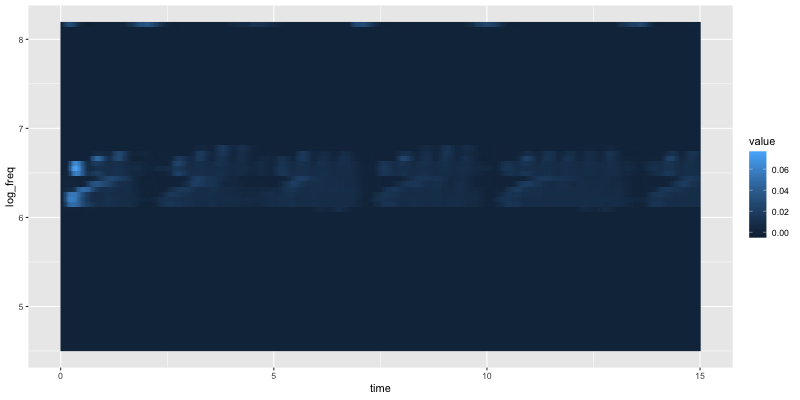

RObject{VecSxp}


In [250]:
plotaxes(result.spect.result[0s .. 15s],:time,:freq => logrange,quantize=(500,128))

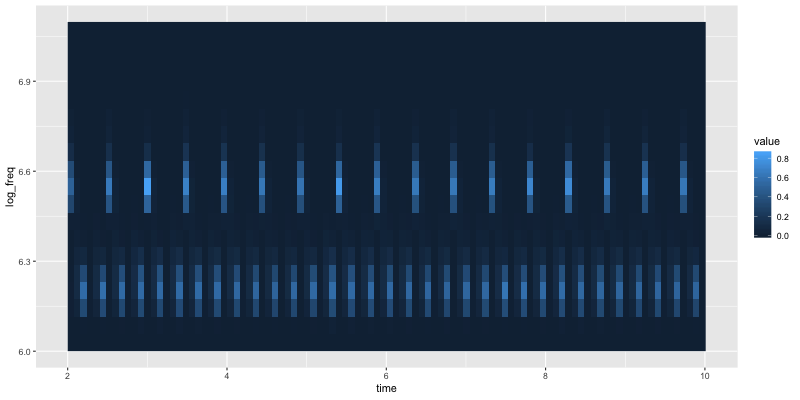

RObject{VecSxp}


In [254]:
plotaxes(result.primary_source[2s .. 10s],:time,:freq => logrange)

In [252]:
result.percepts.counts

([1.6, 0.7, 1.7, 0.7, 0.8, 1.6, 2.2, 0.7, 1.2, 2.1  …  1.6, 0.8, 1.2, 1.4, 2.4, 0.8, 2.1, 1.3, 1.6, 1.3], Bool[false, true, false, true, false, true, false, true, false, true  …  true, false, true, false, true, false, true, false, true, false])

That's weird. It looks like a normal spectrogram (no fluctuation) leads to difference percept lengths, according to my "hueristic". Not good.
Note that, for some reason, this doesn't end up having a high score in spite of the percept counts... need to look more into this.

Let's try to figure this out...

In [283]:
mixture = audiospect_stimulus(p,settings)

┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/stim.jl:43


47.98 s Auditory Spectrogram
time 0.0 - 47.98s
freq 92.5 - 3520.0Hz
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

In [284]:
source = copy(result.primary_source)

47.98 s Auditory Spectrogram
time 0.0 - 47.98s
freq 415.3 - 1174.66Hz
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

In [286]:
percept_lengths(source[3s .. 10s],mixture[3s .. 10s],settings)

([1.0, 0.7, 0.8, 1.6, 2.2], Bool[false, true, false, true, false])

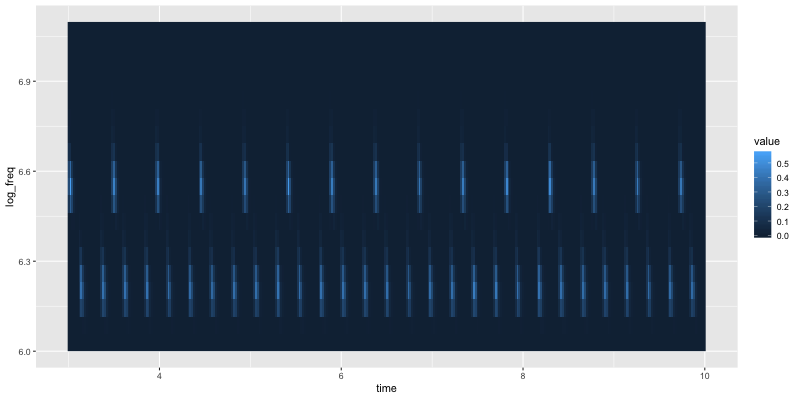

RObject{VecSxp}


In [288]:
plotaxes(source[3s .. 10s],quantize=(600,128),:time,:freq => logrange)

# Best-peforming peripheral-level

In [7]:
p = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,130.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0


In [122]:
result = bistable_model(p,settings,intermediate_results=true);

In [123]:
keys(result)

(:percepts, :primary_source, :sources, :cohere, :cortical, :spect, :input)

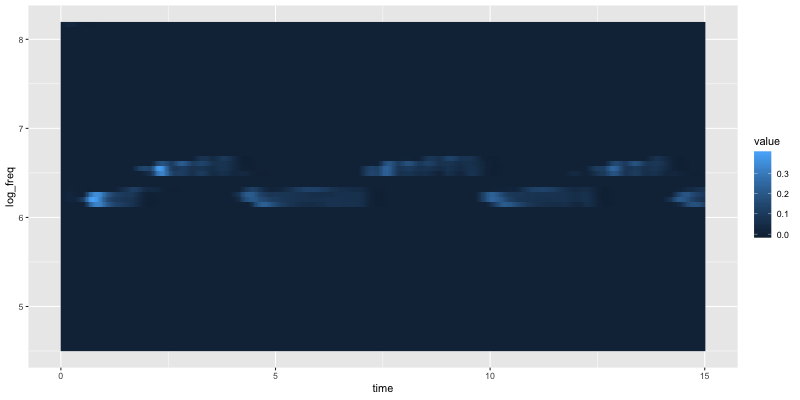

RObject{VecSxp}


In [124]:
plotaxes(result.spect.result[0s .. 15s],:time,:freq => logrange,quantize=(500,128))

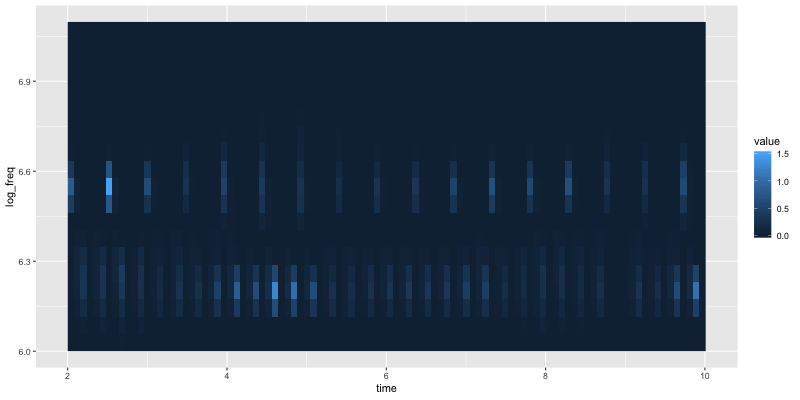

RObject{VecSxp}


In [125]:
plotaxes(result.primary_source[2s .. 10s],:time,:freq => logrange)

In [126]:
result.percepts.counts

([4.9, 1.2, 1.4, 1.5, 1.4, 1.5, 0.7, 0.6, 1.8, 0.7  …  1.3, 0.4, 1.3, 1.3, 1.6, 1.0, 1.6, 3.3, 1.1, 2.5], Bool[false, true, false, true, false, true, false, true, false, true  …  false, true, false, true, false, true, false, true, false, true])

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/Documents/juliadev/PlotAxes/src/ggplot2.jl:23


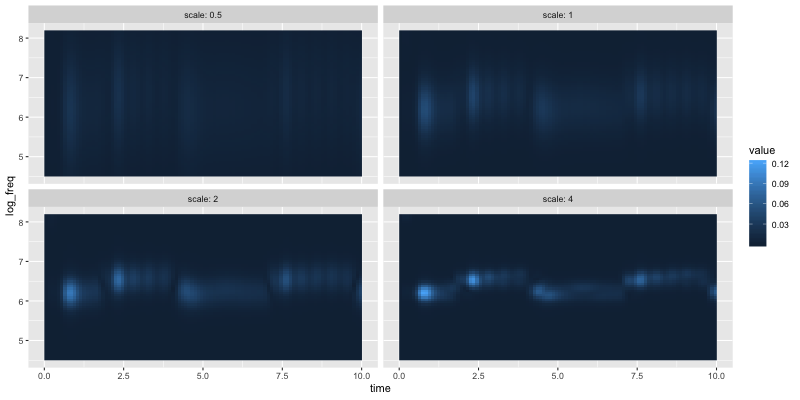

RObject{VecSxp}


In [128]:
plotaxes(result.cortical.result[0s .. 10s])

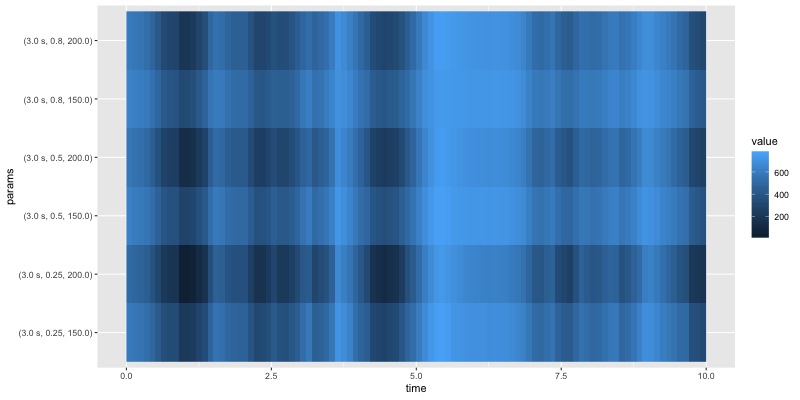

RObject{VecSxp}


In [134]:
plotaxes(result.sources.result[0s .. 10s])

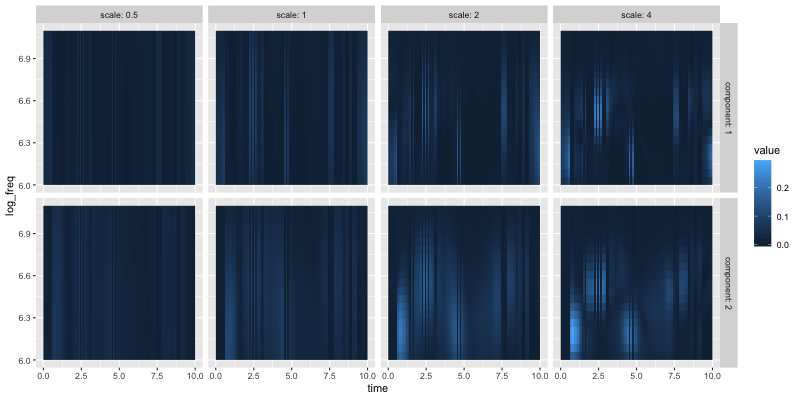

RObject{VecSxp}


In [137]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

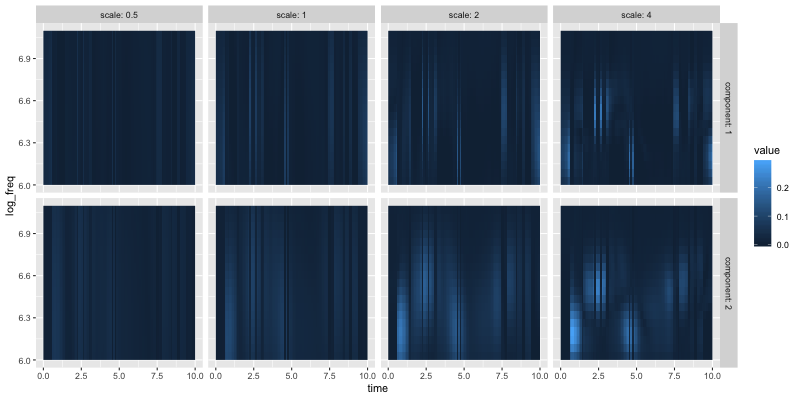

RObject{VecSxp}


In [138]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

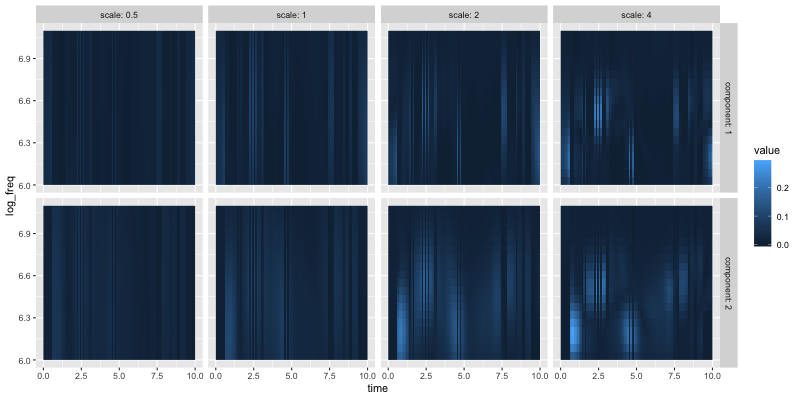

RObject{VecSxp}


In [139]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

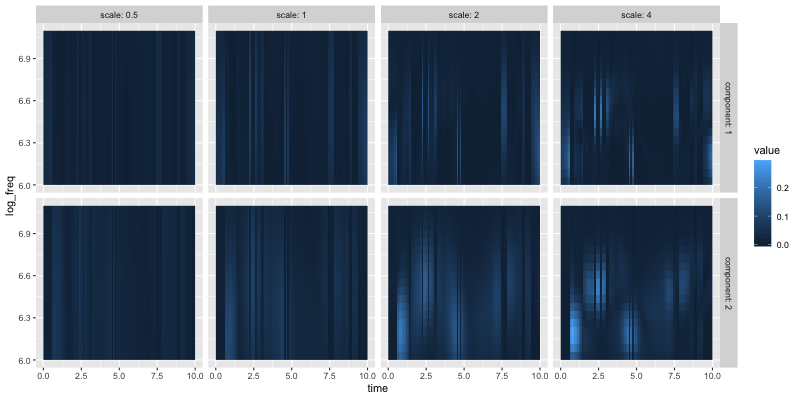

RObject{VecSxp}


In [141]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

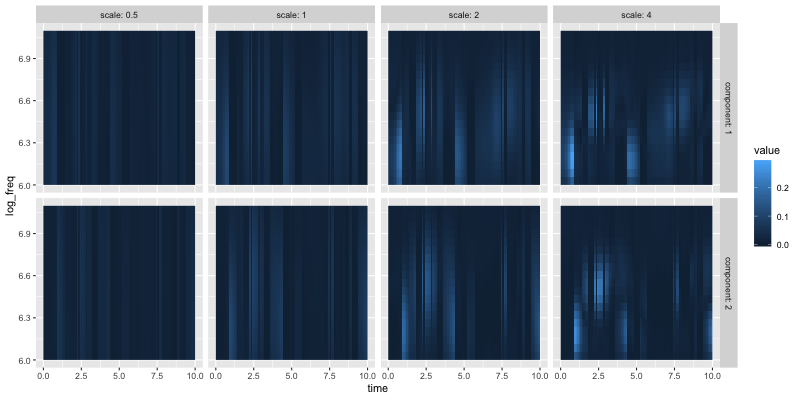

RObject{VecSxp}


In [142]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

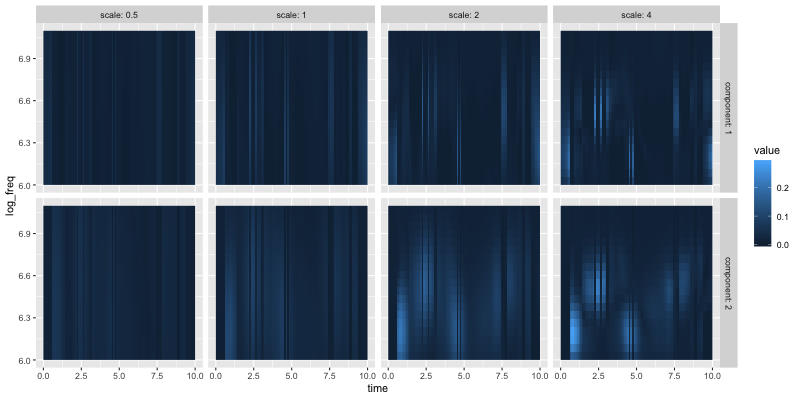

RObject{VecSxp}


In [143]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

The output of the object-level seems almost meaningless here, it is probably not doing very much in this case. 

# Combined simultaenous model

In [8]:
p.f_c_σ

1-element Array{Float64,1}:
 0.2

In [9]:
p = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])
p.s_c_a = 5
p.s_c_m = 5
p.s_c_σ = 0.2
p.t_c_a = 5
p.t_c_m = 5
p.t_c_σ = 0.2

┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:2
└ @ Core In[9]:2
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:3
└ @ Core In[9]:3
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:4
└ @ Core In[9]:4
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:5
└ @ Core In[9]:5
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:6
└ @ Core In[9]:6
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[9]:7
└ @ Core 

0.2

In [10]:
result = bistable_model(p,settings,intermediate_results=true);

In [11]:
result.percepts.counts

([4.6, 3.8, 0.9, 2.0, 1.0, 1.1, 1.2, 2.0, 0.9, 1.2  …  1.4, 1.4, 0.6, 0.8, 2.0, 0.3, 0.8, 2.3, 4.4, 1.8], Bool[false, true, false, true, false, true, false, true, false, true  …  true, false, true, false, true, false, true, false, true, false])

┌ Warning: implicit vector broadcasting in setindex! is deprecated; use `df[:, col_inds] .= Ref(v)` broadcasting assignment to change the columns in place
│   caller = #asplotable#8(::Tuple{Int64,Int64}, ::Function, ::AxisArray{Float64,2,Array{Float64,2},Tuple{Axis{:time,StepRangeLen{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Base.TwicePrecision{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}},Base.TwicePrecision{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}}}},Axis{:freq,Array{Quantity{Float64,𝐓^-1,Unitful.FreeUnits{(Hz,),𝐓^-1,nothing}},1}}}}, ::Symbol, ::Pair{Symbol,typeof(logrange)}) at PlotAxes.jl:234
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/OxaSg/src/PlotAxes.jl:234
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = setindex!(::DataFrame, ::Float64, ::Colon, ::Symbol) at deprecated.jl:1597
└ @ DataFrames /Users/davidlittle/.julia/packages/D

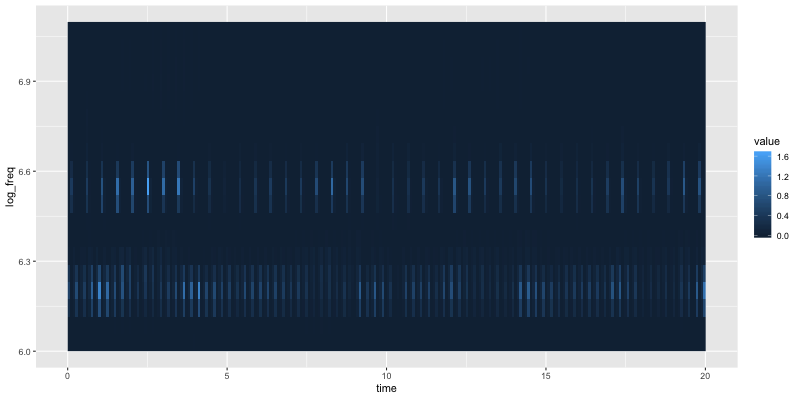

RObject{VecSxp}


In [12]:
plotaxes(result.primary_source[0s .. 20s],:time,:freq => logrange,quantize=(250,128))

In [13]:
sum(result.percepts.counts[1] .* result.percepts.counts[2]) / sum(result.percepts.counts[1])

0.5433403805496829

In [14]:
p3 = copy(p)
p3.Δf = 3
result3 = bistable_model(p3,settings,intermediate_results=true);

┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[14]:2
└ @ Core In[14]:2
┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/stim.jl:43


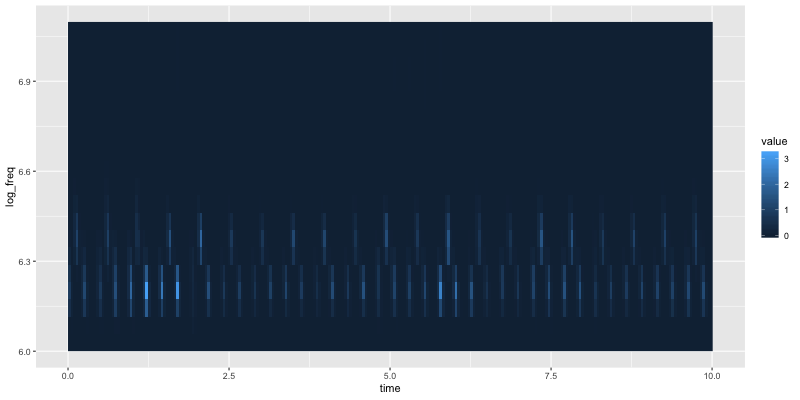

RObject{VecSxp}


In [15]:
plotaxes(result3.primary_source[0s .. 10s],:time,:freq => logrange,quantize=(250,128))

In [172]:
sum(result3.percepts.counts[1] .* result3.percepts.counts[2]) / sum(result3.percepts.counts[1])

0.14376321353065538

In [160]:
p12 = copy(p)
p12.Δf = 12
result12 = bistable_model(p12,settings,intermediate_results=true);

In [173]:
sum(result12.percepts.counts[1] .* result12.percepts.counts[2]) / sum(result12.percepts.counts[1])

1.0

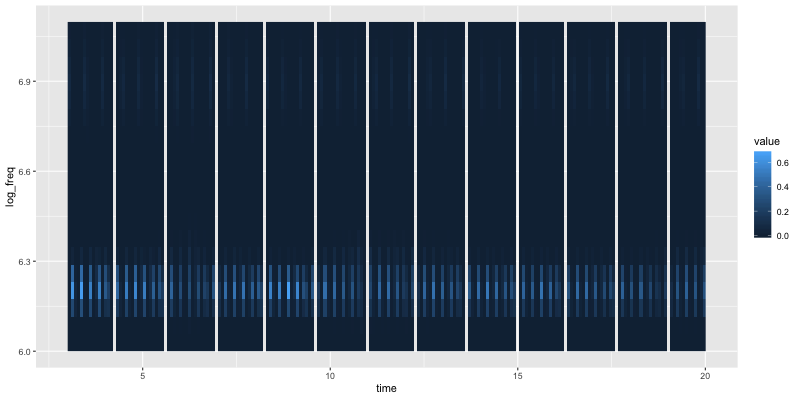

RObject{VecSxp}


In [168]:
plotaxes(result12.primary_source[3s .. 20s],:time,:freq => logrange,quantize=(200,128))

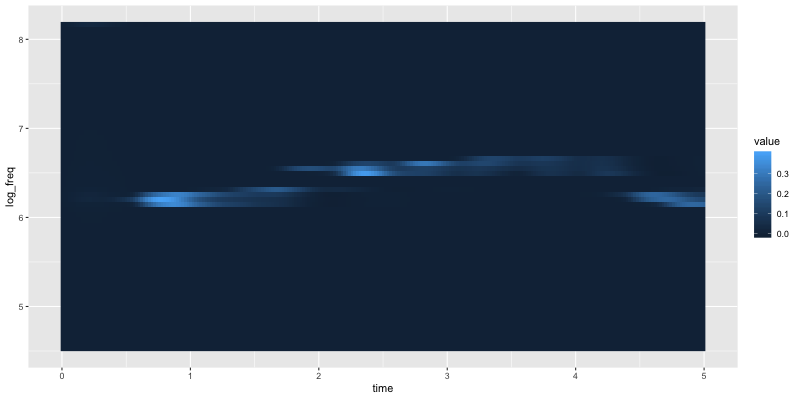

RObject{VecSxp}


In [175]:
plotaxes(result.spect.result[0s .. 5s],:time,:freq => logrange,quantize=(500,128))

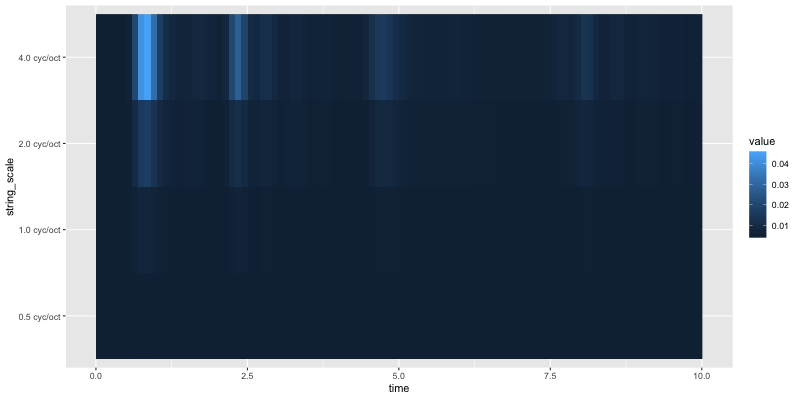

RObject{VecSxp}


In [180]:
plotaxes(result.cortical.inweights[0s .. 10s],:time,:scale => string)

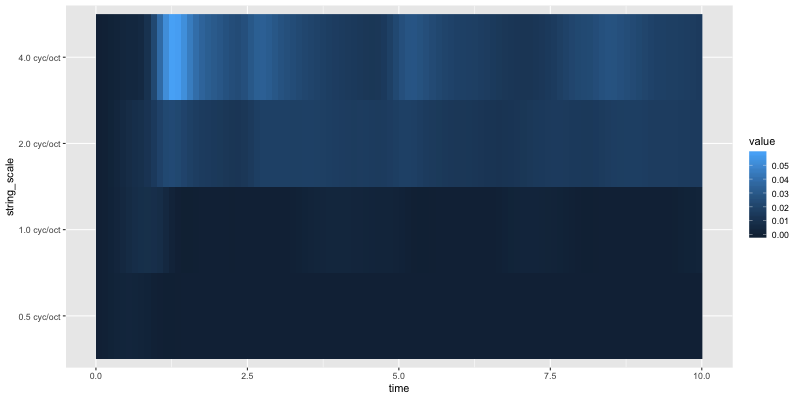

RObject{VecSxp}


In [179]:
plotaxes(result.cortical.outweights[0s .. 10s],:time,:scale => string)

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/Documents/juliadev/PlotAxes/src/ggplot2.jl:23


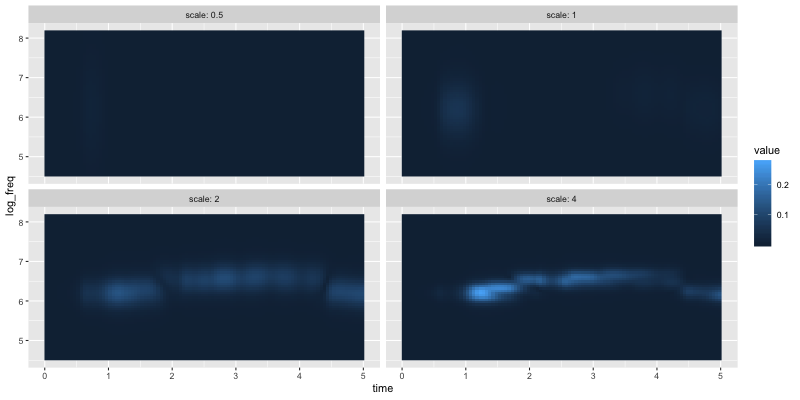

RObject{VecSxp}


In [176]:
plotaxes(result.cortical.result[0s .. 5s],:time,:freq,:scale)

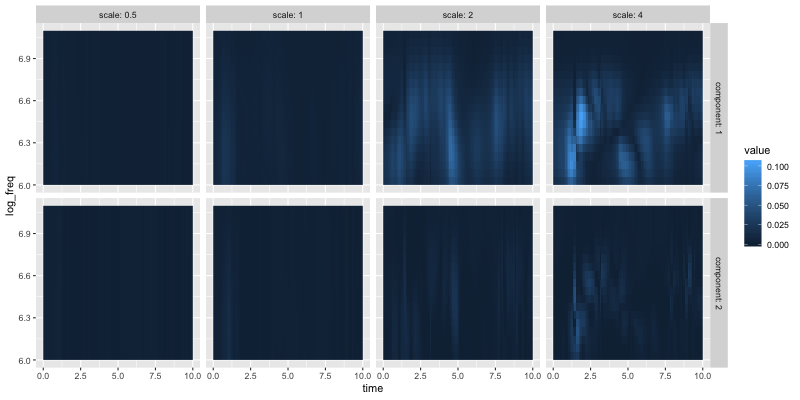

RObject{VecSxp}


In [181]:
plotaxes(result.cohere[0s .. 10s,:,:,:],:time,:freq => logrange,:scale,:component)

┌ Warning: implicit vector broadcasting in setindex! is deprecated; use `df[:, col_inds] .= Ref(v)` broadcasting assignment to change the columns in place
│   caller = #asplotable#8(::Tuple{Int64,Int64}, ::Function, ::AxisArray{Float64,2,Array{Float64,2},Tuple{Axis{:time,StepRangeLen{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Base.TwicePrecision{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}},Base.TwicePrecision{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}}}},Axis{:params,Array{Tuple{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Float64,Float64},1}}}}, ::Symbol, ::Symbol) at PlotAxes.jl:234
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/OxaSg/src/PlotAxes.jl:234
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = setindex!(::DataFrame, ::String, ::Colon, ::Symbol) at deprecated.jl:1597
└ @ DataFrames /Users/davidlittle/.julia/packages/DataFra

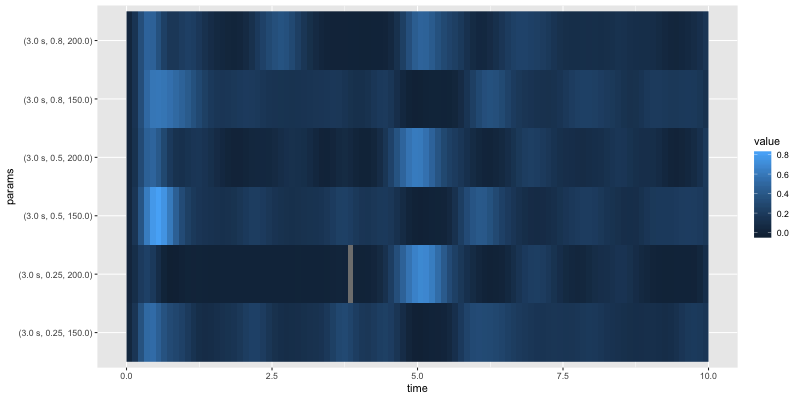

RObject{VecSxp}


In [16]:
plotaxes(result.sources.result[0s .. 10s])

In [ ]:
The above figure looks like build-up is happening to me (i.e. longer phase-1 length). 

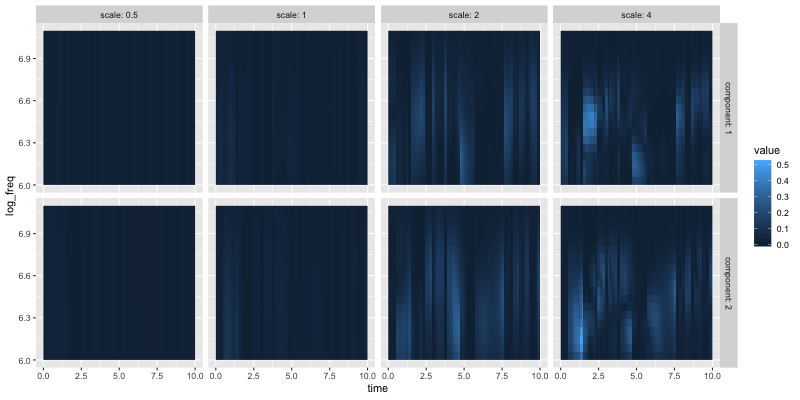

RObject{VecSxp}


In [188]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

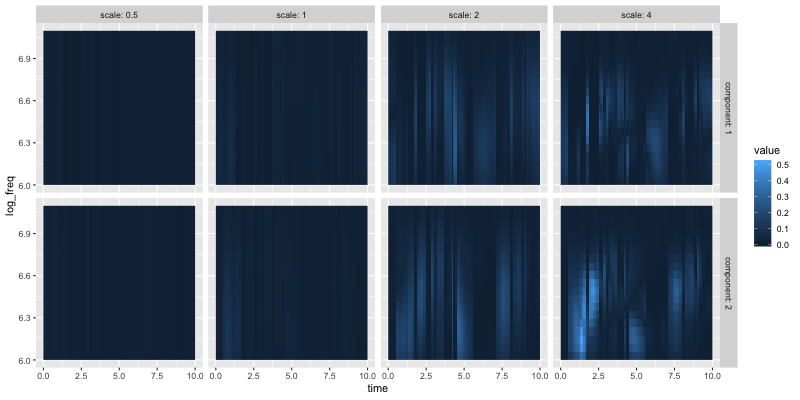

RObject{VecSxp}


In [189]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

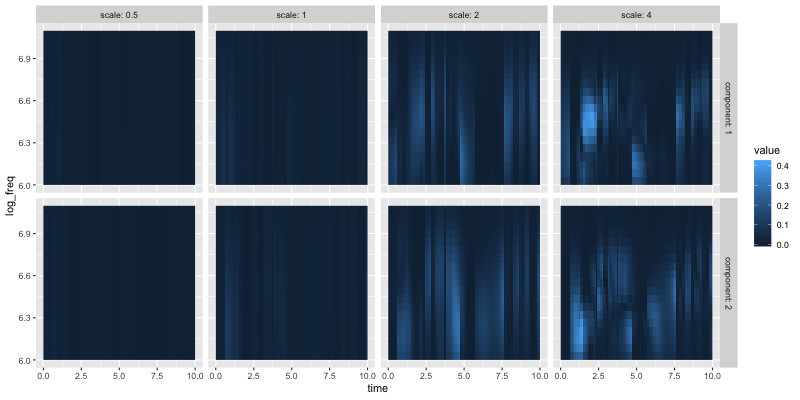

RObject{VecSxp}


In [190]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

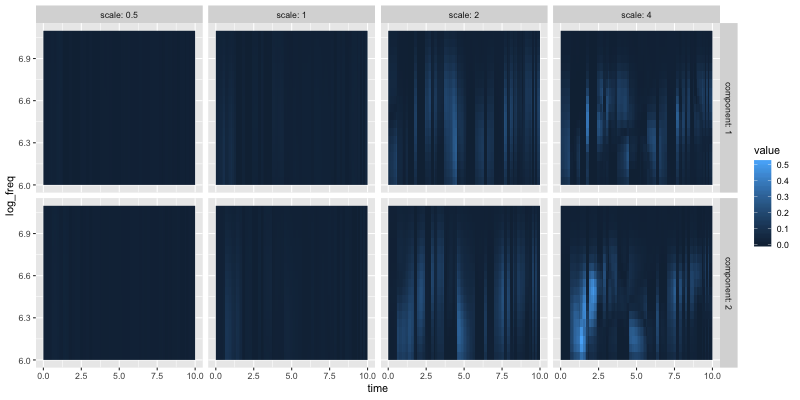

RObject{VecSxp}


In [191]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

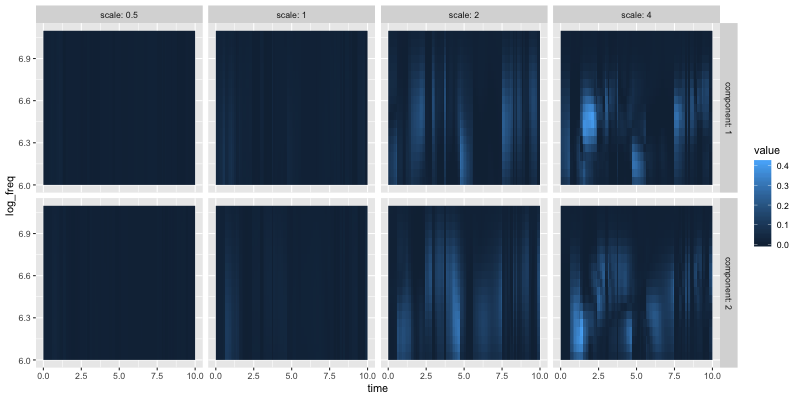

RObject{VecSxp}


In [192]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

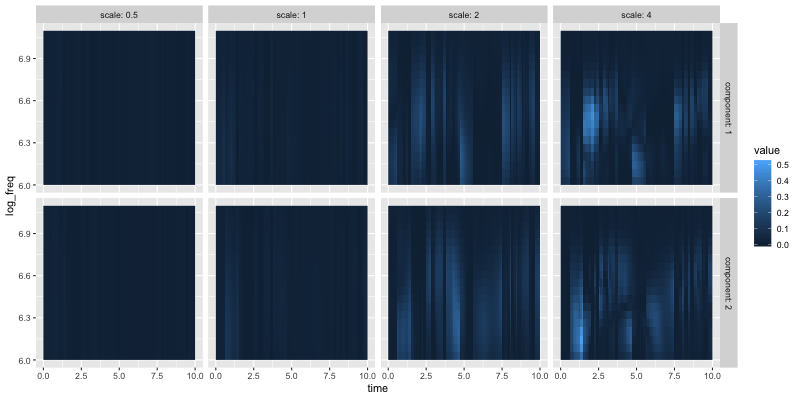

RObject{VecSxp}


In [193]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

## Is this build-up?

In [17]:
result = []
@showprogress for i in 1:25
    with_logger(NullLogger()) do
        len,val = bistable_model(p,settings,intermediate_results=true).percepts.counts
        push!(result,DataFrame(length=len,response=val.+1,run=i))
    end
end
buildup = vcat(result...);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:00


In [18]:
sdf = buildup_mean(buildup,delta=0.24,length=48);

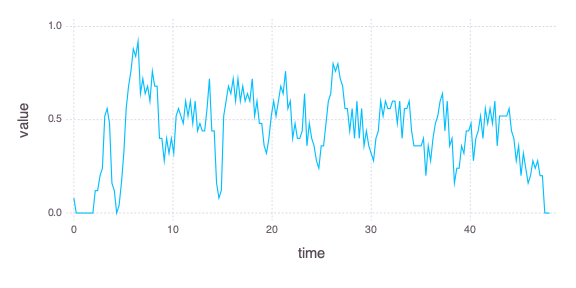

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


false

In [19]:
draw(PNG(6inch,3inch),plot(sdf,x=:time,y=:value,Geom.line,Coord.cartesian(ymax=1.0,xmax=48)))

In [ ]:
Yes, this looks something like build up, but this still has the issue that there is something very predictable across iterations.

Does more noise change the jaggedness of the peaks?

In [208]:
result = []
@showprogress for i in 1:25
    with_logger(NullLogger()) do
        len,val = bistable_model(p,settings,intermediate_results=true).percepts.counts
        push!(result,DataFrame(length=len,response=val.+1,run=i))
    end
end
buildup = vcat(result...);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:18


In [218]:
Δ = 0.24

0.24

In [209]:
sdf = buildup_mean(buildup,delta=Δ,length=48);

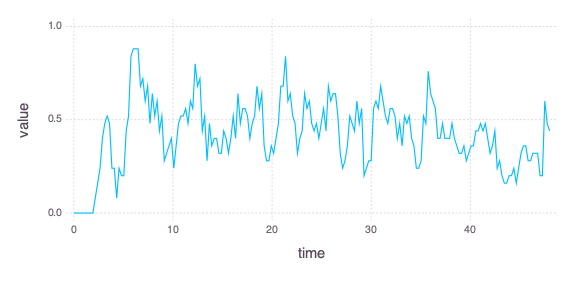

false

In [210]:
draw(PNG(6inch,3inch),plot(sdf,x=:time,y=:value,Geom.line,Coord.cartesian(ymax=1.0,xmax=48)))

Almost identical...

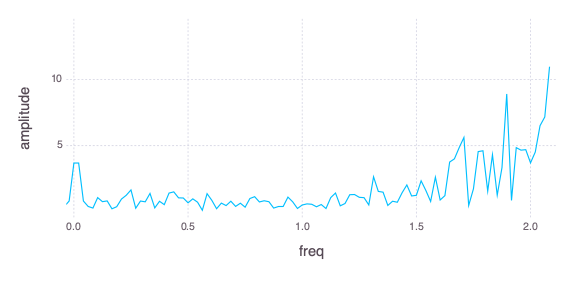

false

In [237]:
Nyquist = 1/2Δ
freqdata = DataFrame(
    amplitude = abs.(fft(sdf.value)),
    freq = range(-Nyquist,Nyquist,length=length(sdf.value))
)
draw(PNG(6inch,3inch),plot(freqdata,x=:freq,y=:amplitude,Geom.line,Coord.cartesian(xmin=0,ymax=14)))

In [39]:
p.f_c_σ .= 0.5
p.s_c_σ .= 0.5
p.t_c_σ .= 0.5

1-element Array{Float64,1}:
 0.5

This doesn't look like it has a paritcular frequency the regularity occurs at. This makes me suspect these regularities are a product of the particular dynamic equations used to generate adaptation, inhibition and noise.

Just to make sure, let's repeat the simulation a lot more:

In [49]:
result = []
settings["stimulus"]["repeats"] = 18
@showprogress for i in 1:2000
    with_logger(NullLogger()) do
        len,val = bistable_model(p,settings,intermediate_results=true).percepts.counts
        push!(result,DataFrame(length=len,response=val.+1,run=i))
    end
end
buildup = vcat(result...);

Progress: 100%|█████████████████████████████████████████| Time: 0:26:42


In [60]:
Δ = 0.02
sdf = buildup_mean(buildup,delta=Δ,length=9);

for each model type (all 4)
        - 3, 6, 12: bulid-up (just the first 5 seconds)
        - current model
        - 1 sample overlap model
        - shorter NMF window ?? (will probalby need more cycles to converge; if it converges, use it)

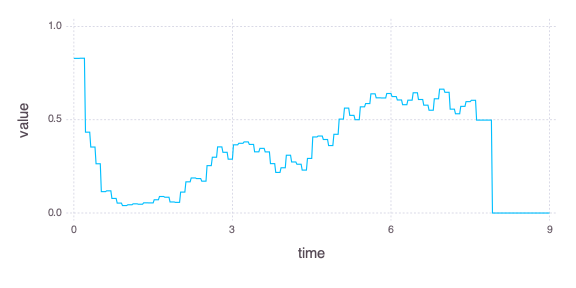

false

In [61]:
draw(PNG(6inch,3inch),plot(sdf,x=:time,y=:value,Geom.line,Coord.cartesian(ymax=1.0,xmax=9)))

In [ ]:
maybe this is okay...?